In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,r2_score
from xgboost import XGBRegressor 
import joblib

In [2]:
df =pd.read_csv("train.csv")
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
df.shape

(1460, 81)

In [4]:
#info of dataset
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


# Missing data can:

Reduce model accuracy

Bias analysis

Distort statistical relationships

Thus, handling missing values is a critical step in your data preprocessing pipeline before modeling.


 Never do:
Never impute target values.

Imputation creates false training signals.

Why Drop?
You cannot train or evaluate a model on rows where y (the target) is unknown.



In [ ]:
missing_values= df.isnull().sum().sort_values(ascending=True)
missing_values

Id                0
MSSubClass        0
MSZoning          0
LotArea           0
LotShape          0
               ... 
MasVnrType      872
Fence          1179
Alley          1369
MiscFeature    1406
PoolQC         1453
Length: 81, dtype: int64

In [7]:
missing_percent=df.isnull().mean()*100
missing_percent=missing_percent[missing_percent > 0].sort_values(ascending=False)
print(missing_percent)

PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
MasVnrType      59.726027
FireplaceQu     47.260274
LotFrontage     17.739726
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
BsmtExposure     2.602740
BsmtFinType2     2.602740
BsmtQual         2.534247
BsmtCond         2.534247
BsmtFinType1     2.534247
MasVnrArea       0.547945
Electrical       0.068493
dtype: float64


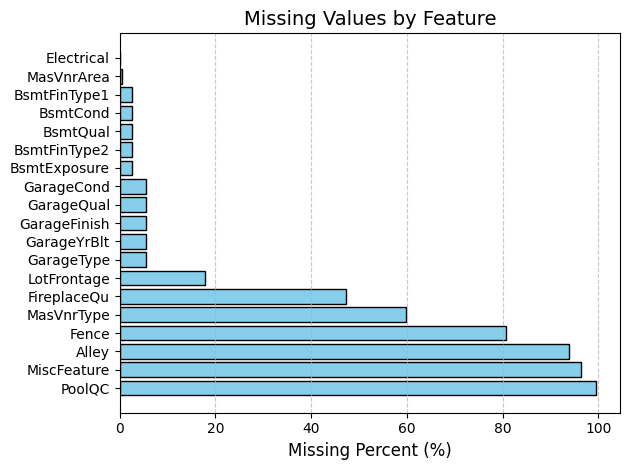

In [9]:
plt.Figure(figsize=(10,6))
plt.barh(missing_percent.index,missing_percent.values,color="skyblue",edgecolor='black')

plt.xlabel("Missing Percent (%)", fontsize=12)
plt.title("Missing Values by Feature", fontsize=14)
plt.grid(axis="x",linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()


In [10]:
print(df.columns.tolist())


['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC'

In [11]:
df.drop(columns=['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'MasVnrArea', 'MasVnrType', 'Electrical'], inplace=True)

In [18]:
df['FireplaceQu'] = df['FireplaceQu'].ffill()
df['GarageType'] = df['GarageType'].ffill()
df['GarageFinish'] = df['GarageFinish'].ffill()
df['GarageQual'] = df['GarageQual'].ffill()
df['BsmtExposure'] = df['BsmtExposure'].ffill()
df['BsmtFinType2'] = df['BsmtFinType2'].ffill()
df['BsmtFinType1'] = df['BsmtFinType1'].ffill()
df['BsmtCond'] = df['BsmtCond'].ffill()
df['BsmtQual']=df['BsmtQual'].ffill()
df['GarageCond']=df['GarageCond'].ffill()

In [19]:
df['LotFrontage'] = df['LotFrontage'].fillna(df['LotFrontage'].max())
df['GarageYrBlt'] = df['GarageYrBlt'].fillna(df['GarageYrBlt'].mean())


In [22]:
df[df['FireplaceQu'].isna()]


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500


In [23]:
df[df['FireplaceQu'].isna()].index


Index([0], dtype='int64')

In [24]:
df.loc[0, 'FireplaceQu'] = df['FireplaceQu'].ffill().iloc[142]


In [25]:
df.isnull().sum().sort_values(ascending=True)


Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 74, dtype: int64

In [ ]:
# #use simpleimputer from sklearn for pipelines

# from sklearn.impute import SimpleImputer
# from sklearn.preprocessing import LabelEncoder


# imputer= SimpleImputer(strategy='median')
# df[['Landsize', 'Bathroom']] =imputer.fit_transform(df[['Landsize', 'Bathroom']])

In [26]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

categorical_cols = df.select_dtypes(include='object').columns

for col in categorical_cols:
    df[col] = le.fit_transform(df[col])


In [27]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,3,65.0,8450,1,3,3,0,4,...,0,0,0,0,0,2,2008,8,4,208500
1,2,20,3,80.0,9600,1,3,3,0,2,...,0,0,0,0,0,5,2007,8,4,181500
2,3,60,3,68.0,11250,1,0,3,0,4,...,0,0,0,0,0,9,2008,8,4,223500
3,4,70,3,60.0,9550,1,0,3,0,0,...,272,0,0,0,0,2,2006,8,0,140000
4,5,60,3,84.0,14260,1,0,3,0,2,...,0,0,0,0,0,12,2008,8,4,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,3,62.0,7917,1,3,3,0,4,...,0,0,0,0,0,8,2007,8,4,175000
1456,1457,20,3,85.0,13175,1,3,3,0,4,...,0,0,0,0,0,2,2010,8,4,210000
1457,1458,70,3,66.0,9042,1,3,3,0,4,...,0,0,0,0,2500,5,2010,8,4,266500
1458,1459,20,3,68.0,9717,1,3,3,0,4,...,112,0,0,0,0,4,2010,8,4,142125


In [29]:
corr_matrix = df.corr()
corr_with_price=corr_matrix['SalePrice'].sort_values(ascending=False)
print("Correlated Features ", corr_with_price.head(25))

Correlated Features  SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
GarageYrBlt     0.470177
Fireplaces      0.466929
BsmtFinSF1      0.386420
Foundation      0.382479
WoodDeckSF      0.324413
2ndFlrSF        0.319334
OpenPorchSF     0.315856
HalfBath        0.284108
LotArea         0.263843
CentralAir      0.251328
PavedDrive      0.231357
BsmtFullBath    0.227122
RoofStyle       0.222405
BsmtUnfSF       0.214479
Name: SalePrice, dtype: float64


In [30]:
c_features = corr_with_price[corr_with_price>0.25].index
df=df[c_features]
df

,SalePrice,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,...,GarageYrBlt,Fireplaces,BsmtFinSF1,Foundation,WoodDeckSF,2ndFlrSF,OpenPorchSF,HalfBath,LotArea,CentralAir
0,208500,7,1710,2,548,856,856,2,8,2003,...,2003.0,0,706,2,0,854,61,1,8450,1
1,181500,6,1262,2,460,1262,1262,2,6,1976,...,1976.0,1,978,1,298,0,0,0,9600,1
2,223500,7,1786,2,608,920,920,2,6,2001,...,2001.0,1,486,2,0,866,42,1,11250,1
3,140000,7,1717,3,642,756,961,1,7,1915,...,1998.0,1,216,0,0,756,35,0,9550,1
4,250000,8,2198,3,836,1145,1145,2,9,2000,...,2000.0,1,655,2,192,1053,84,1,14260,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,175000,6,1647,2,460,953,953,2,7,1999,...,1999.0,1,0,2,0,694,40,1,7917,1
1456,210000,6,2073,2,500,1542,2073,2,7,1978,...,1978.0,2,790,1,349,0,0,0,13175,1
1457,266500,7,2340,1,252,1152,1188,2,9,1941,...,1941.0,2,275,4,0,1152,60,0,9042,1
1458,142125,5,1078,1,240,1078,1078,1,5,1950,...,1950.0,0,49,1,366,0,0,0,9717,1


In [31]:
corr=df

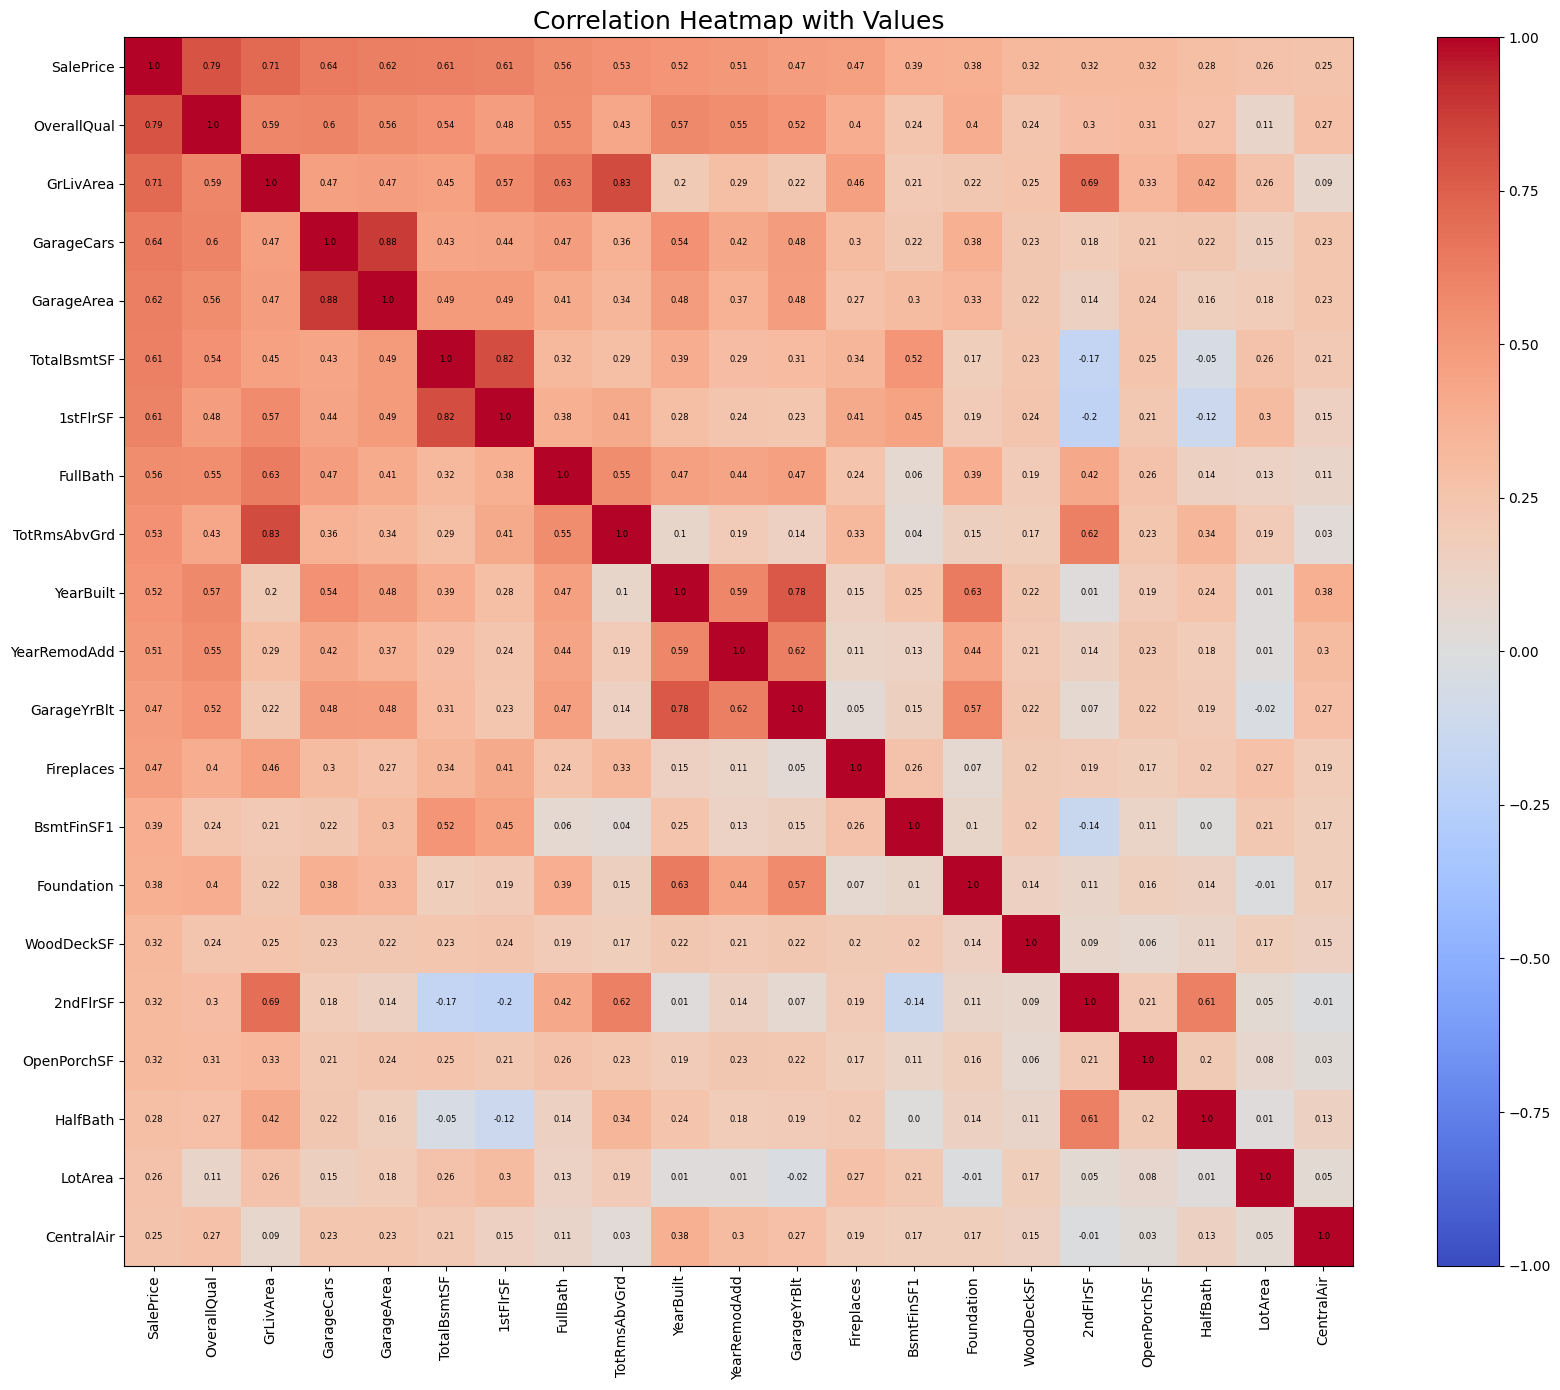

In [34]:
import matplotlib.pyplot as plt
import numpy as np

corr = df.corr()

plt.figure(figsize=(18,14))
plt.imshow(corr, cmap='coolwarm', vmin=-1, vmax=1)
plt.colorbar()

plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)

for i in range(len(corr.columns)):
    for j in range(len(corr.columns)):
        plt.text(j, i, round(corr.iloc[i, j], 2),
                 ha='center', va='center', fontsize=6)

plt.title("Correlation Heatmap with Values", fontsize=18)
plt.tight_layout()
plt.show()


In [35]:
df=df.drop(columns=['GarageCars','GarageYrBlt','Foundation','TotRmsAbvGrd','2ndFlrSF','HalfBath','TotalBsmtSF'])

In [37]:
df.sample(5)

,SalePrice,OverallQual,GrLivArea,GarageArea,1stFlrSF,FullBath,YearBuilt,YearRemodAdd,Fireplaces,BsmtFinSF1,WoodDeckSF,OpenPorchSF,LotArea,CentralAir
404,168000,6,1572,373,806,2,1995,1996,1,0,0,40,10364,1
482,155000,7,1826,164,916,1,1915,2005,1,299,0,0,2500,1
873,133000,5,1268,288,1036,1,1949,1950,1,375,0,28,12144,1
20,325300,8,2376,853,1158,3,2005,2006,1,0,240,154,14215,1
135,174000,7,1682,530,1682,2,1970,1970,1,0,98,0,10400,1


In [38]:
df.isnull().sum()

SalePrice       0
OverallQual     0
GrLivArea       0
GarageArea      0
1stFlrSF        0
FullBath        0
YearBuilt       0
YearRemodAdd    0
Fireplaces      0
BsmtFinSF1      0
WoodDeckSF      0
OpenPorchSF     0
LotArea         0
CentralAir      0
dtype: int64

In [39]:
x=df.drop('SalePrice', axis=1)
y=df['SalePrice']

In [42]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

In [43]:
print("x_train shape : ", x_train.shape)
print("x_test shape  : ", x_test.shape)
print("y_train shape : ", y_train.shape)
print("y_test shape  : ", y_test.shape)

x_train shape :  (1168, 13)
x_test shape  :  (292, 13)
y_train shape :  (1168,)
y_test shape  :  (292,)


In [44]:
model=XGBRegressor(
    objective='reg:squarederror',
    learning_rate = 0.01,
    max_depth = 6,
    n_estimators = 1000,
    subsample = 0.65,
    random_state = 42
)

model.fit(x_train,y_train)

,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [45]:
y_pred = model.predict(x_test)

In [46]:
mae = mean_absolute_error(y_test,y_pred)
print("MAE : ",mae)
r2_score=r2_score(y_test,y_pred)
print("r2_score : ",r2_score)

MAE :  18124.154296875
r2_score :  0.9031821489334106


In [48]:
joblib.dump(model,'xgb_model.jb')

['xgb_model.jb']

In [49]:
df.columns

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageArea', '1stFlrSF',
       'FullBath', 'YearBuilt', 'YearRemodAdd', 'Fireplaces', 'BsmtFinSF1',
       'WoodDeckSF', 'OpenPorchSF', 'LotArea', 'CentralAir'],
      dtype='object')